In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
%matplotlib inline

In [2]:
data = pd.read_csv('./gender_classification.csv')
print(data.shape)
data.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df = data.copy()

In [4]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df['gender'] = df.gender.replace(to_replace="Male", value=1)
df['gender'] = df.gender.replace(to_replace="Female", value=0)
df = df.astype({'gender': 'int64'})

In [7]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


<AxesSubplot:>

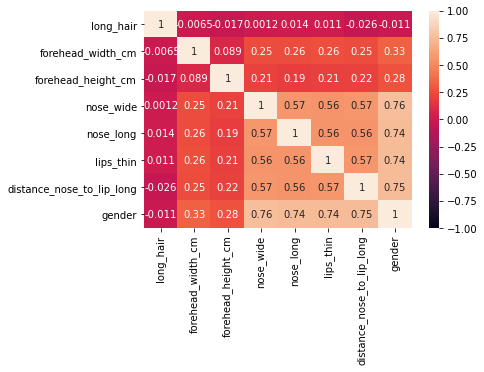

In [8]:
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

In [9]:
df.gender.value_counts()

0    2501
1    2500
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

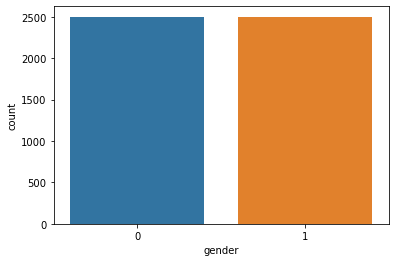

In [10]:
sns.countplot(data=df,x='gender')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [12]:
X_train.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4677,1,15.4,6.6,0,1,1,1
800,1,12.2,5.2,0,0,0,0
3671,0,11.5,5.8,0,0,0,0
4193,1,12.7,5.1,0,0,0,0
2968,1,15.1,5.6,1,1,1,1


In [13]:
y_train.head()

4677    1
800     0
3671    0
4193    0
2968    1
Name: gender, dtype: int64

In [14]:
train_df = X_train.copy()
train_df["gender"] = y_train  

In [15]:
train_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4677,1,15.4,6.6,0,1,1,1,1
800,1,12.2,5.2,0,0,0,0,0
3671,0,11.5,5.8,0,0,0,0,0
4193,1,12.7,5.1,0,0,0,0,0
2968,1,15.1,5.6,1,1,1,1,1


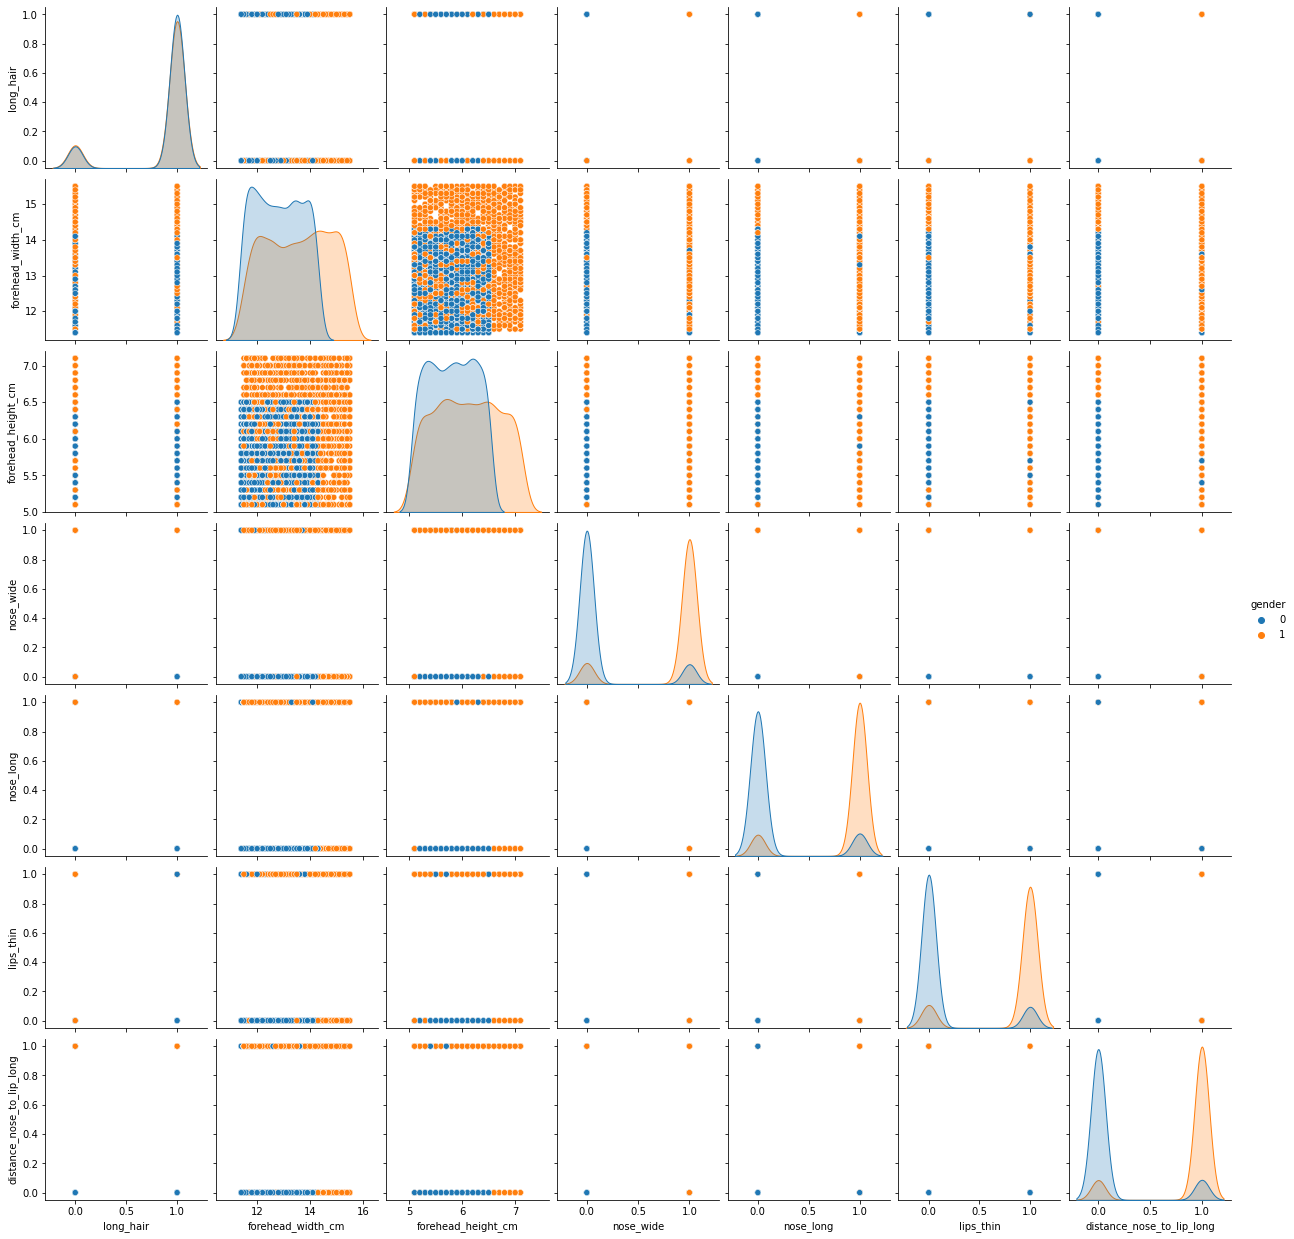

In [16]:
sns.pairplot(train_df, hue="gender")

In [17]:
lm2 = LogisticRegression(C=300)
lm2.fit(X_train,y_train)
lm2.score(X_test, y_test)

0.961038961038961

In [18]:
c_range = list(range(1, 10001, 1000))
c_scores = []
for c in c_range:
    lm1 = LogisticRegression(C=c)
    c_scores.append(cross_val_score(lm1, df.iloc[:,:-1], df.iloc[:, -1], cv=10, scoring="accuracy").mean())

Text(0.5, 0, 'Cross validation accuracy')

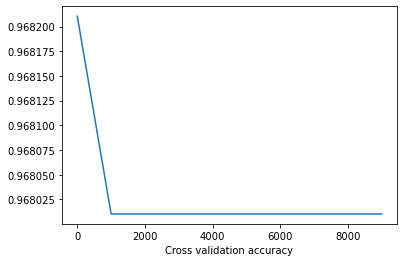

In [19]:
plt.plot(c_range, c_scores)
plt.xlabel("Value of C in Logistic regression")
plt.xlabel("Cross validation accuracy")

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.961038961038961

In [21]:
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    k_scores.append(cross_val_score(knn, df.iloc[:,:-1], df.iloc[:, -1], cv=10, scoring="accuracy").mean())

Text(0.5, 0, 'Cross validation accuracy')

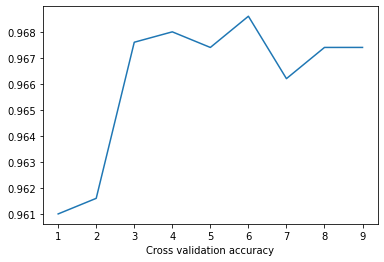

In [22]:
plt.plot(k_range, k_scores)
plt.xlabel("Value of K in KNN")
plt.xlabel("Cross validation accuracy")

In [23]:
randomForest = RandomForestClassifier(n_estimators=1000)
randomForest.fit(X_train,y_train)
randomForest.score(X_test, y_test)

0.961038961038961

In [24]:
r_range = list(range(1, 1000, 100))
r_scores = []
for r in r_range:
    randomForest = RandomForestClassifier(n_estimators=r )
    r_scores.append(cross_val_score(knn, df.iloc[:,:-1], df.iloc[:, -1], cv=10, scoring="accuracy").mean())

Text(0.5, 0, 'Cross validation accuracy')

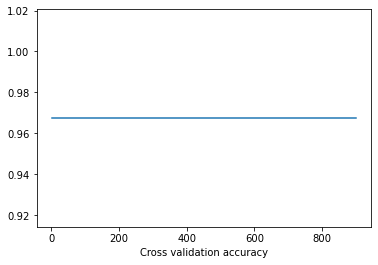

In [25]:
plt.plot(r_range, r_scores)
plt.xlabel("Value of N estimators in Random forest")
plt.xlabel("Cross validation accuracy")

In [62]:
def model_selecting(classifier, parms, X_train, X_test):
    clf = GridSearchCV(classifier, parms, cv = 10, scoring='accuracy')

    clf.fit(X_train, y_train)

    print(f"{type(classifier).__name__} Model best params are: {clf.best_params_} and the best score is {clf.best_score_}")
    print(f"The model got score {clf.score(X_test, y_test)} on testing data")
    
    return clf

In [53]:
lm3 = LogisticRegression()
params = [{'C': range(1, 10001, 1000)}]
lm3 = model_selecting(lm3, params, X_train, X_test)

LogisticRegression Model is best params are: {'C': 1001} and the best score is 0.96975
The model got score 0.961038961038961 on testing data


In [54]:
knn = KNeighborsClassifier()
params = [{'n_neighbors': range(1, 10)}]
knn = model_selecting(knn, params, X_train, X_test)

KNeighborsClassifier Model is best params are: {'n_neighbors': 8} and the best score is 0.9710000000000001
The model got score 0.965034965034965 on testing data


In [55]:
rfc = RandomForestClassifier()
params = [{'n_estimators': list(range(1, 1000, 100))}]
rfc = model_selecting(rfc, params, X_train, X_test)
rfc.fe

RandomForestClassifier Model is best params are: {'n_estimators': 201} and the best score is 0.97525
The model got score 0.9600399600399601 on testing data


In [ ]:
svm_model = svm.SVC()
params = [{"kernel": ["linear", "poly", "rbf", "sigmoid"]}]
svm_model = model_selecting(svm_model, params, X_train, X_test)

# Drop long hair column

In [60]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [63]:
lm4 = LogisticRegression()
params = [{'C': range(1, 10001, 1000)}]
lm4 = model_selecting(lm4, params, X_train_1, X_test_1)

LogisticRegression Model best params are: {'C': 1} and the best score is 0.9682499999999999
The model got score 0.9600399600399601 on testing data
